In [1]:
#|default_exp app

In [2]:
#|export 
from fastai.vision.all import *
import gradio as gr

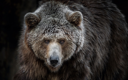

In [4]:
im = PILImage.create('grizzly.jpg')
im.to_thumb(128,128)

In [5]:
#|export
learner = load_learner("export.pkl")

In [6]:
learner.predict(im)

('grizzly', tensor(1), tensor([1.9000e-03, 9.9809e-01, 1.3905e-05]))

In [8]:
learner.dls.vocab

['black', 'grizzly', 'teddy']

In [13]:
#|export
def classify_image(img):
    pred,pred_idx,probs = learner.predict(img)
    return dict(zip(learner.dls.vocab,map(float,probs)))


In [14]:
classify_image(im)

{'black': 0.0018999901367351413,
 'grizzly': 0.9980860948562622,
 'teddy': 1.3904779734730255e-05}

In [15]:
#|export
image = gr.inputs.Image(shape = (224,224))
label = gr.outputs.Label()
examples = ["grizzly.jpg"]
intf = gr.Interface(fn=classify_image,inputs =image, outputs=label, examples =examples )
intf.launch(inline=False)

/home/nehaiitr/mambaforge/envs/jlabenv/lib/python3.11/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/nehaiitr/mambaforge/envs/jlabenv/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/nehaiitr/mambaforge/envs/jlabenv/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/nehaiitr/mambaforge/envs/jlabenv/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [21]:
import nbdev
nbdev.export.nb_export('app.ipynb','app')